In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.signal import savgol_filter

In [2]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 24})

### Load data throughtput and network availability

In [3]:
config1_dyn_data = pd.read_csv("config1/dynamic_analysis/data_throughput/monthly_data_throughput.csv",delimiter=",", dtype=str)
config1_dyn_avai = pd.read_csv("config1/dynamic_analysis/network_availability/monthly_network_availability.csv",delimiter=",", dtype=str)


In [4]:
config2_dyn_data = pd.read_csv("config2/dynamic_analysis/data_throughput/monthly_data_throughput.csv",delimiter=",", dtype=str)
config2_dyn_avai = pd.read_csv("config2/dynamic_analysis/network_availability/monthly_network_availability.csv",delimiter=",", dtype=str)

In [5]:
config3_dyn_data = pd.read_csv("config3/dynamic_analysis/data_throughput/monthly_data_throughput.csv",delimiter=",", dtype=str)
config3_dyn_avai = pd.read_csv("config3/dynamic_analysis/network_availability/monthly_network_availability.csv",delimiter=",", dtype=str)

In [6]:
config4_dyn_data = pd.read_csv("config4/dynamic_analysis/data_throughput/monthly_data_throughput.csv",delimiter=",", dtype=str)
config4_dyn_avai = pd.read_csv("config4/dynamic_analysis/network_availability/monthly_network_availability.csv",delimiter=",", dtype=str)

In [7]:
config1_nb = 1
config2_nb = 3
config3_nb = 5
config4_nb = 7

nb_OGS = np.array([config1_nb, config2_nb, config3_nb, config4_nb])

In [8]:
config_dyn_data = np.array([float(config1_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float).mean()), float(config2_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float).mean()), float(config3_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float).mean()), float(config4_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float).mean())])
#config_sta_data = np.array([float(config1_sta_data['Total Data Transmitted (Gbits)'][4]), float(config2_sta_data['Total Data Transmitted (Gbits)'][4]), float(config3_sta_data['Total Data Transmitted (Gbits)'][4]), float(config4_sta_data['Total Data Transmitted (Gbits)'][4])])

In [9]:
config_dyn_avai = np.array([float(config1_dyn_avai['Network Availability (%)'].astype(float).mean()), float(config2_dyn_avai['Network Availability (%)'].astype(float).mean()), float(config3_dyn_avai['Network Availability (%)'].astype(float).mean()), float(config4_dyn_avai['Network Availability (%)'].astype(float).mean())])
#config_sta_avai = np.array([float(config1_sta_avai['Network Availability (%)'][4]), float(config2_sta_avai['Network Availability (%)'][4]), float(config3_sta_avai['Network Availability (%)'][4]), float(config4_sta_avai['Network Availability (%)'][4])])

In [10]:
config_perc_avai = np.array([float(config1_dyn_data['Percentage_Data_Throughput_(%)'].astype(float).mean()), float(config2_dyn_data['Percentage_Data_Throughput_(%)'].astype(float).mean()), float(config3_dyn_data['Percentage_Data_Throughput_(%)'].astype(float).mean()), float(config4_dyn_data['Percentage_Data_Throughput_(%)'].astype(float).mean())])


In [11]:
float(config1_dyn_data['Total_Data_Transmitted_(Gbits)'][4])

714.3382331054681

In [12]:
config4_dyn_data

,Month,Total_Data_Transmitted_(Gbits),Maximum_Possible_Data_(Gbits),Percentage_Data_Throughput_(%)
0,2023-06,21715.42654109978,612895.0,3.54309082976689
1,2023-07,29264.031350974004,634055.0,4.6153774279792765
2,2023-08,46607.40078149116,635340.0,7.335820313767615
3,2023-09,16806.62904711293,608535.0,2.7618179804140977
4,2023-10,74249.54005397586,630795.0,11.770787665402525
5,2023-11,39802.92787802908,609250.0,6.533102647193939
6,2023-12,59457.94049905475,627515.0,9.475142506402994
7,2024-01,59715.96864840199,625200.0,9.551498504222968
8,2024-02,59109.308858325305,578330.0,10.220688682642317
9,2024-03,38205.329334893664,621795.0,6.144360976671357


7399065.0

# IAC24 plots

#### Network availability

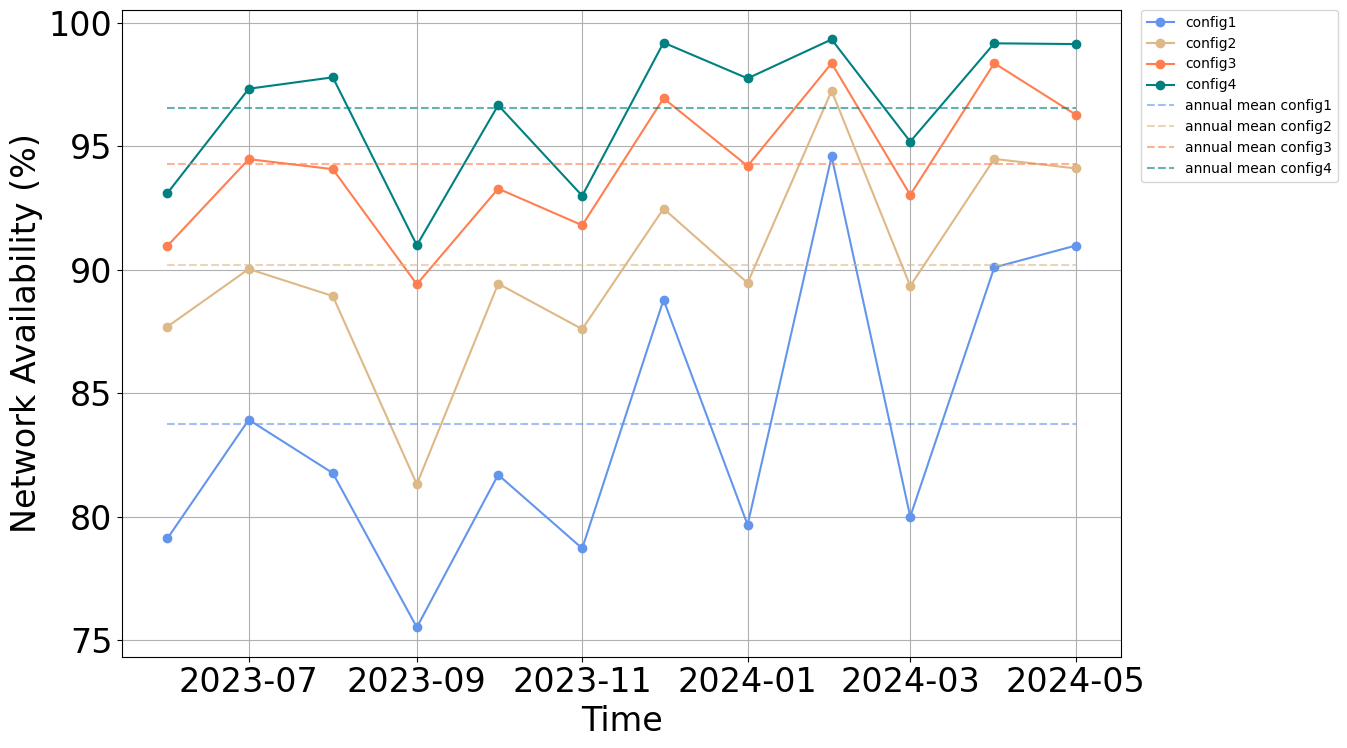

In [12]:
plt.figure(figsize=(14,8))
color1 = 'cornflowerblue'
color2 = 'burlywood'
color3 = 'coral'
color4 = 'teal'
plt.plot(pd.to_datetime(config1_dyn_avai['Month']), config1_dyn_avai['Network Availability (%)'].astype(float), color = color1, label=f"config1", marker="o")
plt.plot(pd.to_datetime(config2_dyn_avai['Month']), config2_dyn_avai['Network Availability (%)'].astype(float), color2 , label=f"config2", marker="o")
plt.plot(pd.to_datetime(config3_dyn_avai['Month']), config3_dyn_avai['Network Availability (%)'].astype(float), color3, label=f"config3", marker="o")
plt.plot(pd.to_datetime(config4_dyn_avai['Month']), config4_dyn_avai['Network Availability (%)'].astype(float), color4, label=f"config4", marker="o")

# Mean values

plt.plot(pd.to_datetime(config1_dyn_avai['Month']), config1_dyn_avai['Network Availability (%)'].astype(float).mean() * np.ones(12), "--", color = color1, alpha=0.6, label=f"annual mean config1")
plt.plot(pd.to_datetime(config2_dyn_avai['Month']), config2_dyn_avai['Network Availability (%)'].astype(float).mean() * np.ones(12), "--", color=color2, alpha=0.6, label=f"annual mean config2")
plt.plot(pd.to_datetime(config3_dyn_avai['Month']), config3_dyn_avai['Network Availability (%)'].astype(float).mean() * np.ones(12), "--", color=color3, alpha=0.6, label=f"annual mean config3")
plt.plot(pd.to_datetime(config4_dyn_avai['Month']), config4_dyn_avai['Network Availability (%)'].astype(float).mean() * np.ones(12), "--", color=color4, alpha=0.6, label=f"annual mean config4")

plt.grid()
plt.xlabel('Time')
#plt.yscale("log")
plt.ylabel('Network Availability (%)')

#plt.title('Network Availability (%) in dynamic scenarios')
#plt.legend(loc = "lower right" , prop={'size': 15})
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, prop={'size': 10})
plt.savefig('00_network_availability.svg')

### Transmitted data

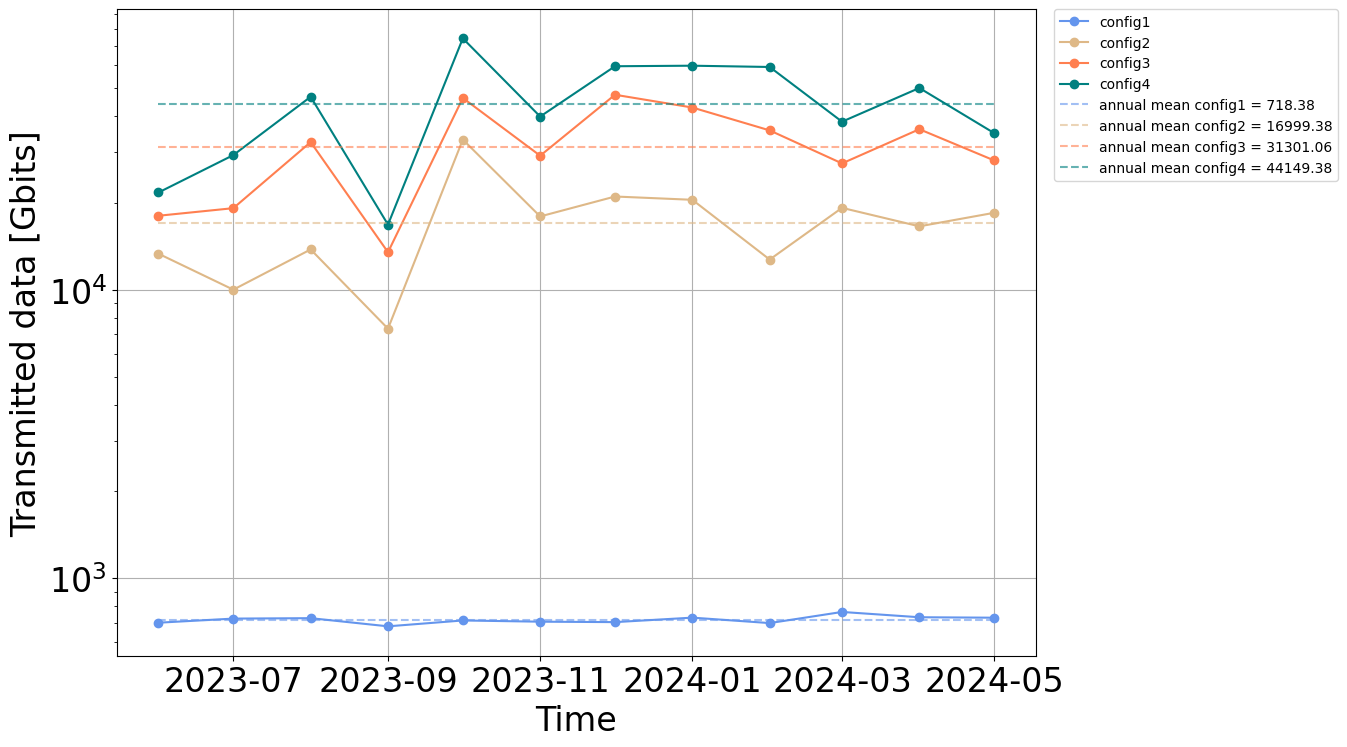

In [15]:
plt.figure(figsize=(14,8))
plt.plot(pd.to_datetime(config1_dyn_data['Month']), config1_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float), color=color1, label=f"config1", marker="o")
plt.plot(pd.to_datetime(config2_dyn_data['Month']), config2_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float), color=color2, label=f"config2", marker="o")
plt.plot(pd.to_datetime(config3_dyn_data['Month']), config3_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float), color=color3, label=f"config3", marker="o")
plt.plot(pd.to_datetime(config4_dyn_data['Month']), config4_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float), color=color4, label=f"config4", marker="o")

# Annual mean

plt.plot(pd.to_datetime(config1_dyn_data['Month']), config1_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float).mean()*np.ones(12), "--", color = color1, alpha=0.6, label=f"annual mean config1 = {round(config1_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float).mean(),2)}")
plt.plot(pd.to_datetime(config2_dyn_data['Month']), config2_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float).mean()*np.ones(12), "--", color = color2, alpha=0.6, label=f"annual mean config2 = {round(config2_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float).mean(),2)}")
plt.plot(pd.to_datetime(config3_dyn_data['Month']), config3_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float).mean()*np.ones(12), "--", color = color3, alpha=0.6, label=f"annual mean config3 = {round(config3_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float).mean(),2)}")
plt.plot(pd.to_datetime(config4_dyn_data['Month']), config4_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float).mean()*np.ones(12), "--", color = color4, alpha=0.6, label=f"annual mean config4 = {round(config4_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float).mean(),2)}")



plt.grid()
plt.xlabel('Time')
plt.yscale("log")
plt.ylabel('Transmitted data [Gbits]')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, prop={'size': 10})
#plt.legend(loc = "lower right" , prop={'size': 15})
plt.savefig('00_transmitted_data.svg')

### PDT (Percentage of Data Transferred)

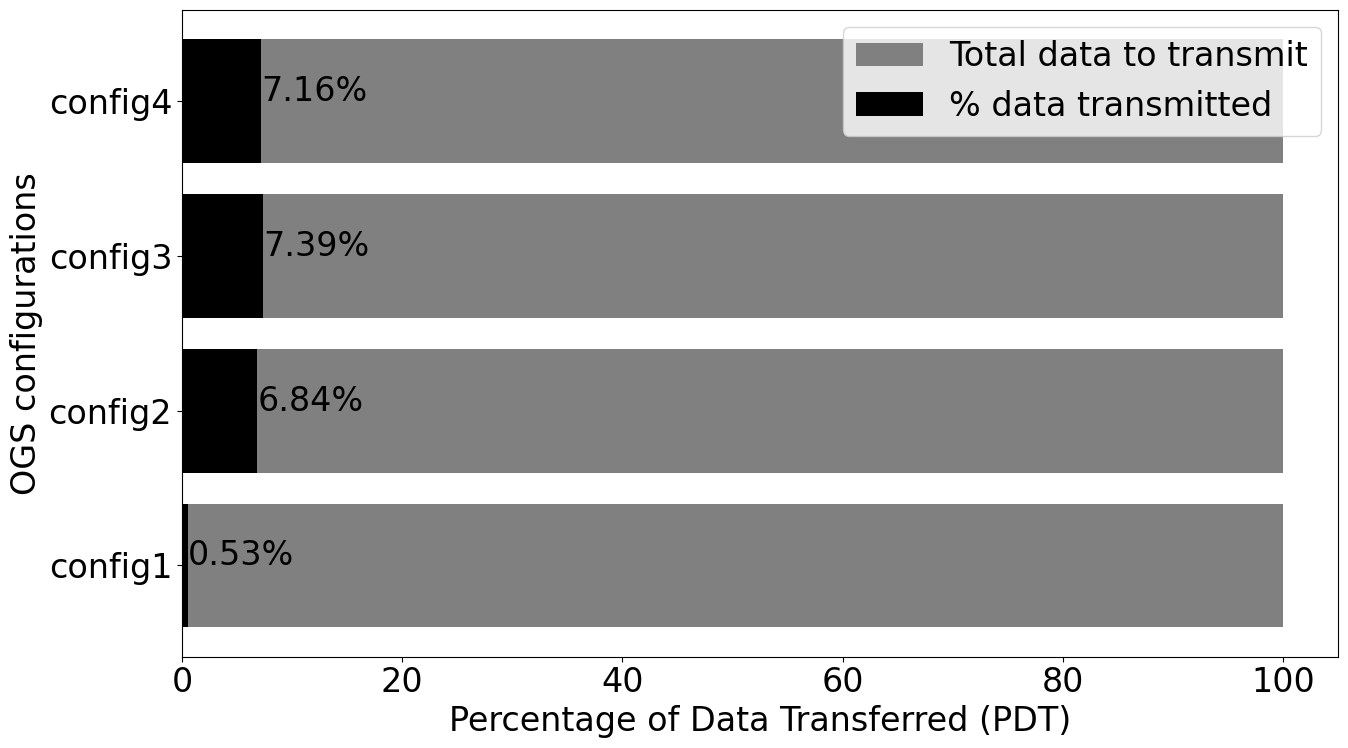

In [63]:
plt.figure(figsize=(14,8))
configurations = ["config1", "config2", "config3", "config4"]

b1 = plt.barh(configurations, np.array([100,100,100,100]), color="grey")
b2 = plt.barh(configurations, config_perc_avai, color="black")

for index, value in enumerate(config_perc_avai):
    plt.text(value, index, f"{round(value,2)}%")
    
plt.legend([b1, b2], ["Total data to transmit", "% data transmitted"], loc="upper right")
plt.xlabel("Percentage of Data Transferred (PDT)")
plt.ylabel("OGS configurations")



plt.savefig('00_PDT.svg')

Text(0, 0.5, 'OGS configurations')

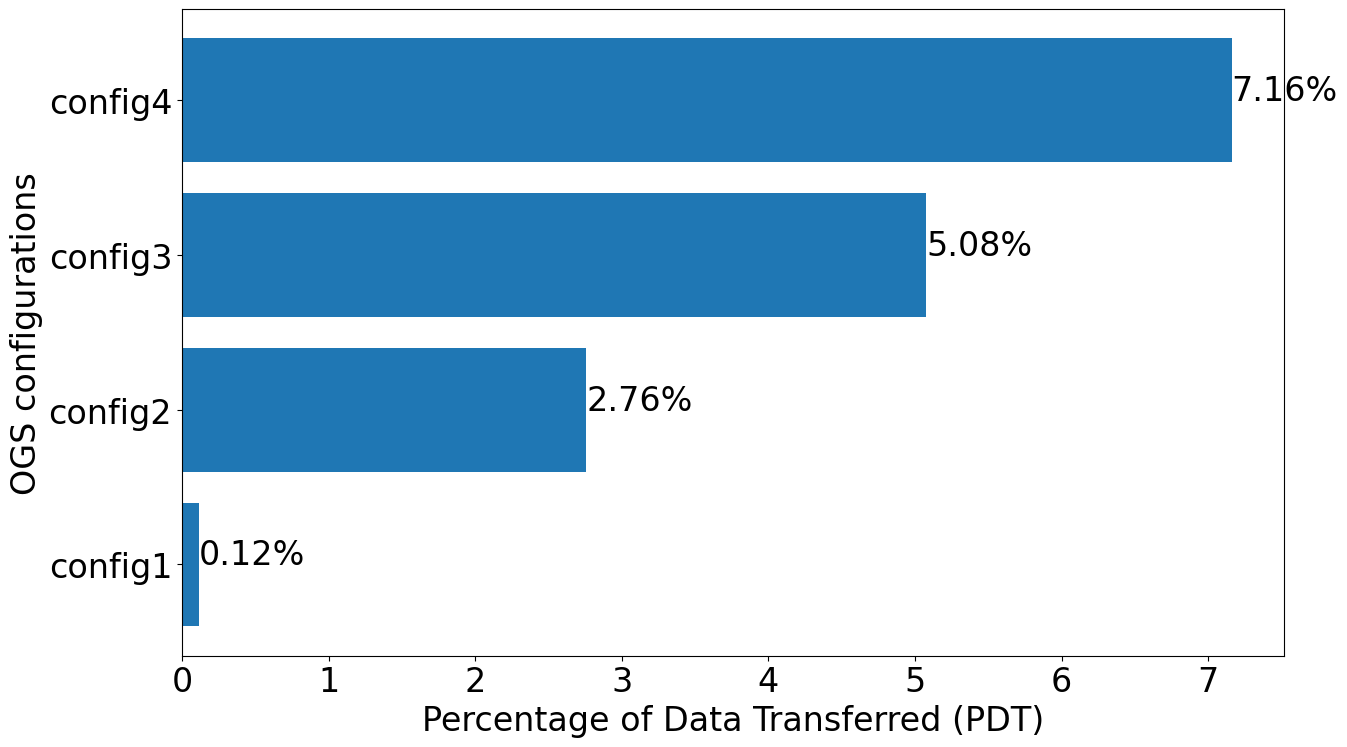

In [30]:
PDT = np.array([config1_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float).sum()/config4_dyn_data['Maximum_Possible_Data_(Gbits)'].astype(float).sum()* 100, config2_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float).sum()/config4_dyn_data['Maximum_Possible_Data_(Gbits)'].astype(float).sum()* 100, config3_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float).sum()/config4_dyn_data['Maximum_Possible_Data_(Gbits)'].astype(float).sum()* 100, config4_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float).sum()/config4_dyn_data['Maximum_Possible_Data_(Gbits)'].astype(float).sum()* 100])

plt.figure(figsize=(14,8))
configurations = ["config1", "config2", "config3", "config4"]

#b1 = plt.barh(configurations, np.array([100,100,100,100]), color="grey")
b1 = plt.barh(configurations, PDT)

for index, value in enumerate(PDT):
    plt.text(value, index, f"{round(value,2)}%")
    
#plt.legend([b1], ["Total data to transmit", "% data transmitted"], loc="upper right")
plt.xlabel("Percentage of Data Transferred (PDT)")
plt.ylabel("OGS configurations")

7399065.0

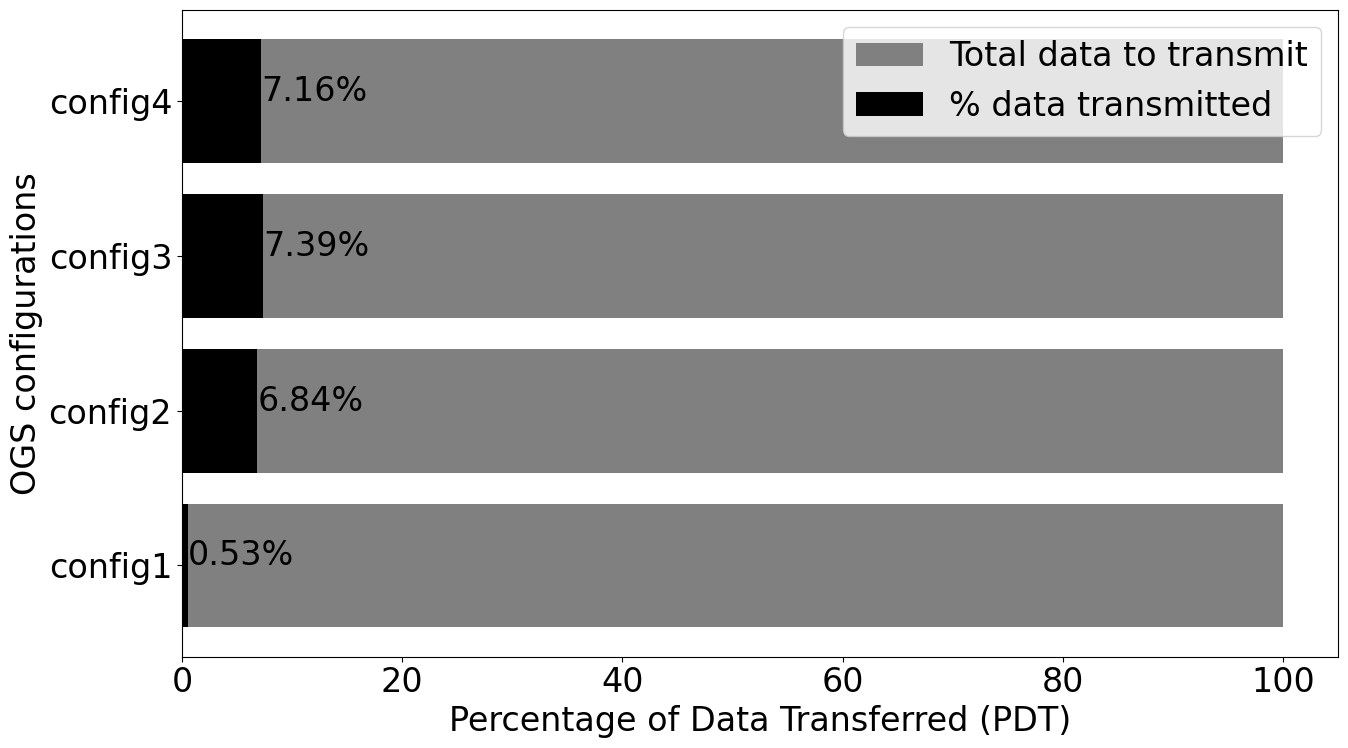

In [13]:

### HERE write the other version of the figure normalising by config4

plt.figure(figsize=(14,8))
configurations = ["config1", "config2", "config3", "config4"]

b1 = plt.barh(configurations, np.array([100,100,100,100]), color="grey")
b2 = plt.barh(configurations, config_perc_avai, color="black")

for index, value in enumerate(config_perc_avai):
    plt.text(value, index, f"{round(value,2)}%")
    
plt.legend([b1, b2], ["Total data to transmit", "% data transmitted"], loc="upper right")
plt.xlabel("Percentage of Data Transferred (PDT)")
plt.ylabel("OGS configurations")



plt.savefig('00_PDT.svg')

config4_dyn_data['Maximum_Possible_Data_(Gbits)'].astype(float).sum()

### Availability + data transmitted

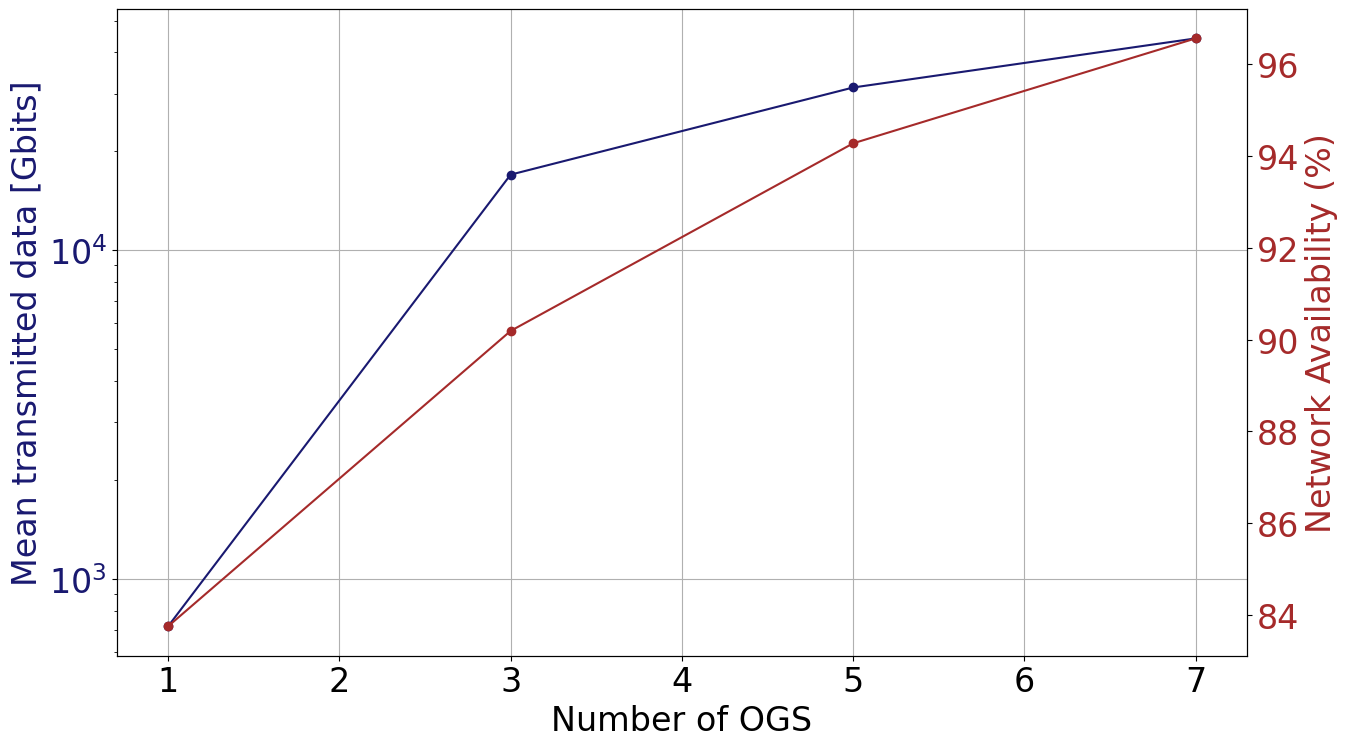

In [81]:
fig, ax1 = plt.subplots(figsize=(14,8))
ax1.plot(nb_OGS, config_dyn_data, "midnightblue",  marker='o')
plt.grid()
ax1.set_xlabel('Number of OGS')
ax1.set_yscale("log")
ax1.set_ylabel('Mean transmitted data [Gbits]',  color="midnightblue")
ax1.tick_params(axis='y', labelcolor="midnightblue")

ax2 = ax1.twinx() 
ax2.plot(nb_OGS, config_dyn_avai, "brown", marker='o')
ax2.set_ylabel('Network Availability (%)', color="brown")
ax2.tick_params(axis='y', labelcolor="brown")


plt.savefig('00_avai_data.svg')

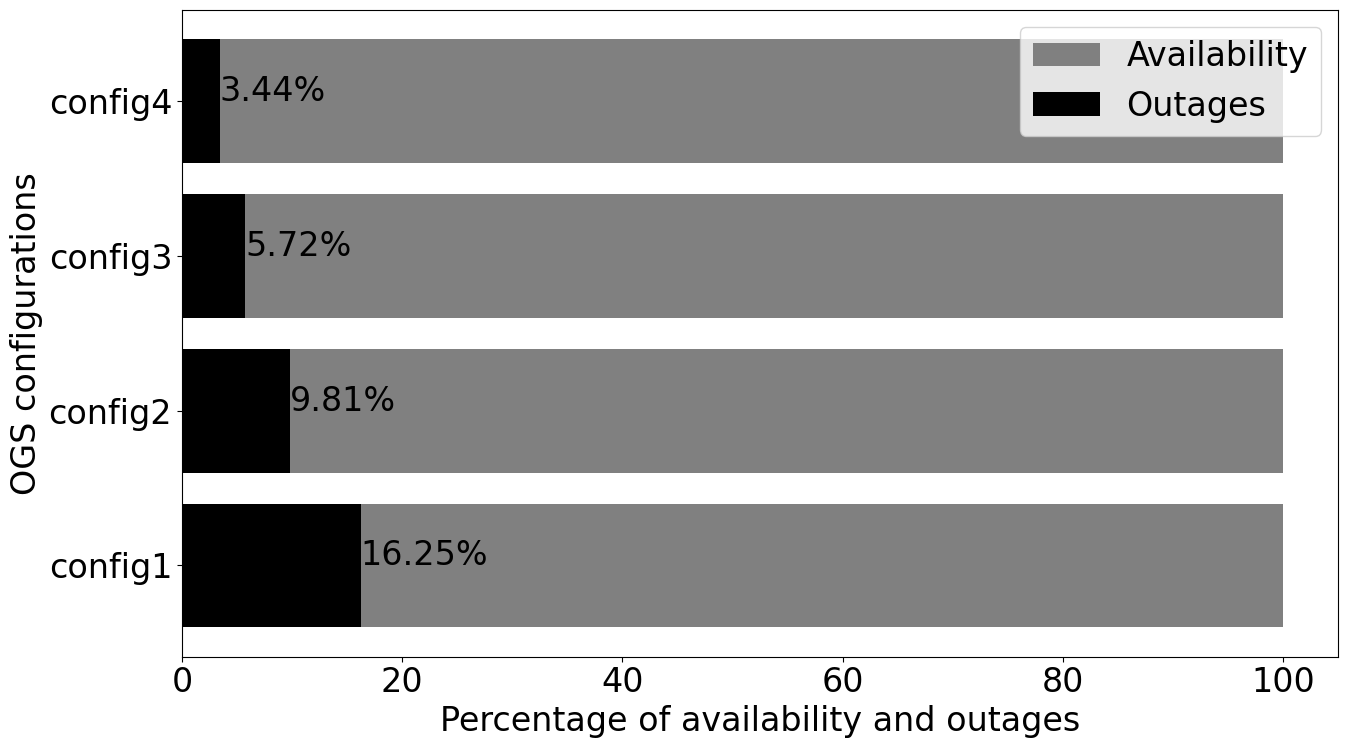

In [92]:
plt.figure(figsize=(14,8))
configurations = ["config1", "config2", "config3", "config4"]
dyn_avai = [config1_dyn_avai['Network Availability (%)'].astype(float).sum()/(12*100), config2_dyn_avai['Network Availability (%)'].astype(float).sum()/(12*100), config3_dyn_avai['Network Availability (%)'].astype(float).sum()/(12*100), config4_dyn_avai['Network Availability (%)'].astype(float).sum()/(12*100)]
dyn_out = 100* np.array([1-config1_dyn_avai['Network Availability (%)'].astype(float).sum()/(12*100), 1-config2_dyn_avai['Network Availability (%)'].astype(float).sum()/(12*100), 1-config3_dyn_avai['Network Availability (%)'].astype(float).sum()/(12*100), 1-config4_dyn_avai['Network Availability (%)'].astype(float).sum()/(12*100)])

b1 = plt.barh(configurations, np.array([100,100,100,100]), color="grey")
b2 = plt.barh(configurations, dyn_out, color="black")

for index, value in enumerate(dyn_out):
    plt.text(value, index, f"{round(value,2)}%")
    
plt.legend([b1, b2], ["Availability", "Outages"], loc="upper right")
plt.xlabel("Percentage of availability and outages")
plt.ylabel("OGS configurations")
#plt.title("Availability vs Outages % for dynamic scenarios")

plt.savefig('00_outages_avai.svg')
plt.show()



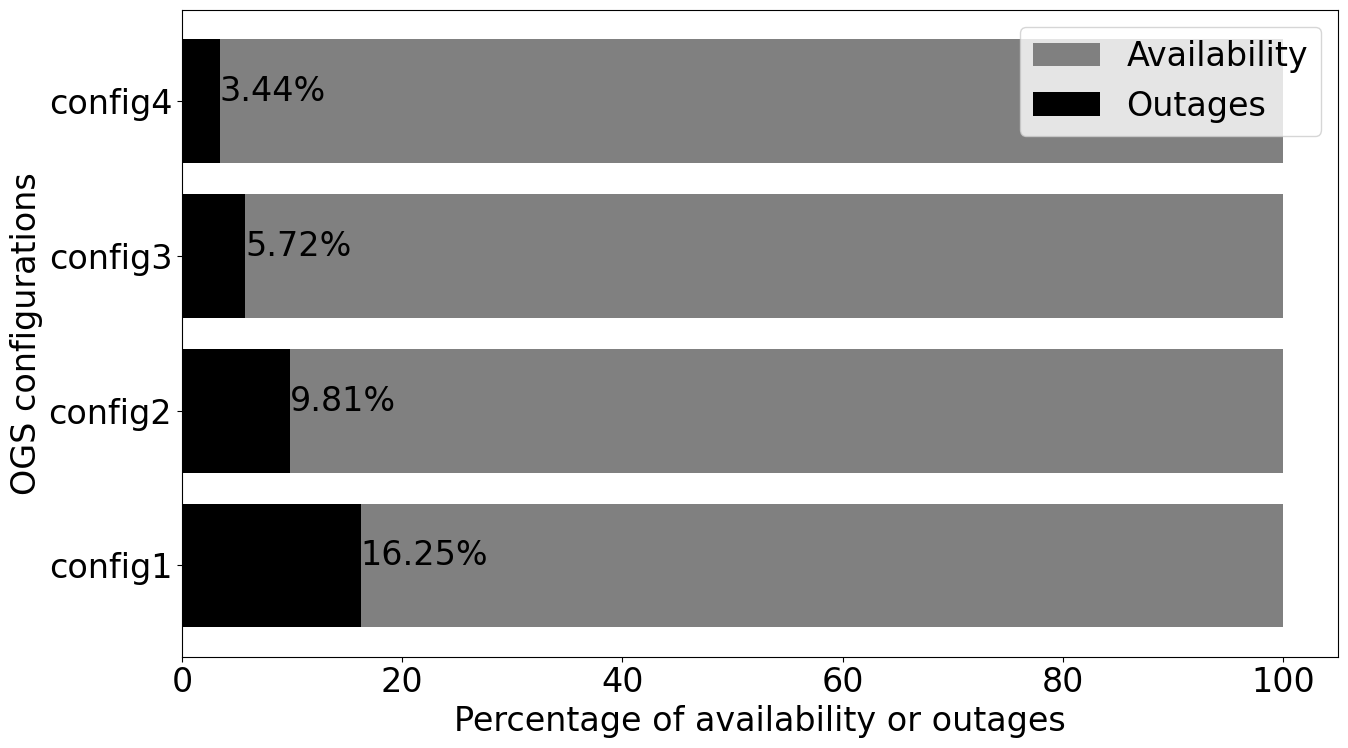

In [91]:
plt.figure(figsize=(14,8))
configurations = ["config1", "config2", "config3", "config4"]
dyn_avai = [config1_dyn_avai['Network Availability (%)'].astype(float).mean(), config2_dyn_avai['Network Availability (%)'].astype(float).mean(), config3_dyn_avai['Network Availability (%)'].astype(float).mean(), config4_dyn_avai['Network Availability (%)'].astype(float).mean()]
dyn_out = np.array([100-config1_dyn_avai['Network Availability (%)'].astype(float).mean(), 100-config2_dyn_avai['Network Availability (%)'].astype(float).mean(), 100-config3_dyn_avai['Network Availability (%)'].astype(float).mean(), 100-config4_dyn_avai['Network Availability (%)'].astype(float).mean()])

b1 = plt.barh(configurations, np.array([100,100,100,100]), color="grey")
b2 = plt.barh(configurations, dyn_out, color="black")

for index, value in enumerate(dyn_out):
    plt.text(value, index, f"{round(value,2)}%")
    
plt.legend([b1, b2], ["Availability", "Outages"], loc="upper right")
plt.xlabel("Percentage of availability or outages")
plt.ylabel("OGS configurations")
#plt.title("Availability vs Outages % for dynamic scenarios")

plt.savefig('00_outages_avai.svg')
plt.show()



## Other plots

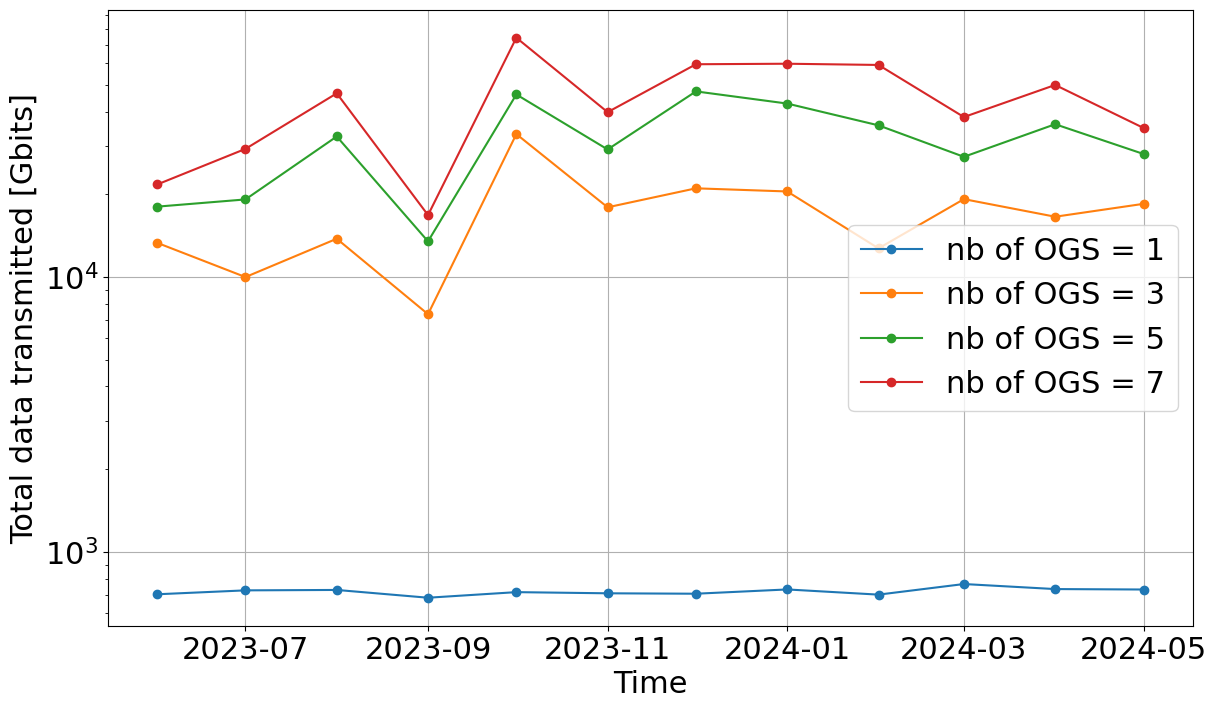

In [29]:
plt.figure(figsize=(14,8))
plt.plot(pd.to_datetime(config1_dyn_data['Month']), config1_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float), label=f"nb of OGS = {config1_nb}", marker="o")
plt.plot(pd.to_datetime(config2_dyn_data['Month']), config2_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float), label=f"nb of OGS = {config2_nb}", marker="o")
plt.plot(pd.to_datetime(config3_dyn_data['Month']), config3_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float), label=f"nb of OGS = {config3_nb}", marker="o")
plt.plot(pd.to_datetime(config4_dyn_data['Month']), config4_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float), label=f"nb of OGS = {config4_nb}", marker="o")
plt.grid()
plt.xlabel('Time')
plt.yscale("log")
plt.ylabel('Total data transmitted [Gbits]')
#plt.title('Data transmitted in dynamic scenarios')
plt.legend(loc='center right' )
plt.savefig('Data_dynamic.svg')

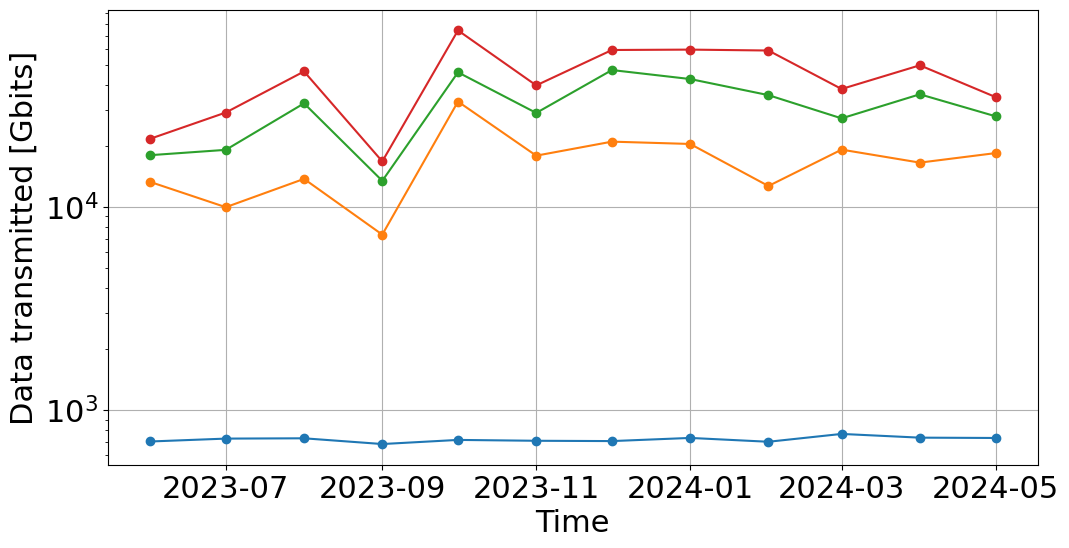

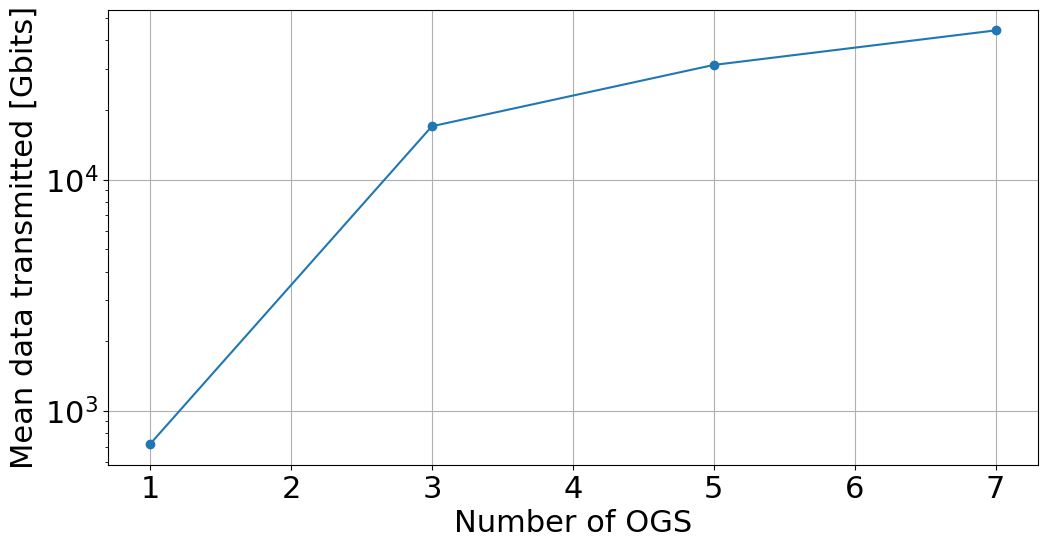

In [104]:

plt.figure(figsize=(12,13))
plt.subplot(2, 1, 1)
plt.plot(pd.to_datetime(config1_dyn_data['Month']), config1_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float), label=f"nb of OGS = {config1_nb}", marker="o")
plt.plot(pd.to_datetime(config2_dyn_data['Month']), config2_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float), label=f"nb of OGS = {config2_nb}", marker="o")
plt.plot(pd.to_datetime(config3_dyn_data['Month']), config3_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float), label=f"nb of OGS = {config3_nb}", marker="o")
plt.plot(pd.to_datetime(config4_dyn_data['Month']), config4_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float), label=f"nb of OGS = {config4_nb}", marker="o")
plt.grid()
plt.xlabel('Time')
plt.yscale("log")
plt.ylabel('Data transmitted [Gbits]')

#ax2 = plt.subplots(2, 1, figsize=(12, 10))

plt.figure(figsize=(12,13))
plt.subplot(2, 1, 2)
plt.plot(nb_OGS, config_dyn_data,  marker='o')
plt.grid()
plt.xlabel('Number of OGS')
plt.yscale("log")
plt.ylabel('Mean data transmitted [Gbits]')


plt.savefig('Data_tx_combined.png')

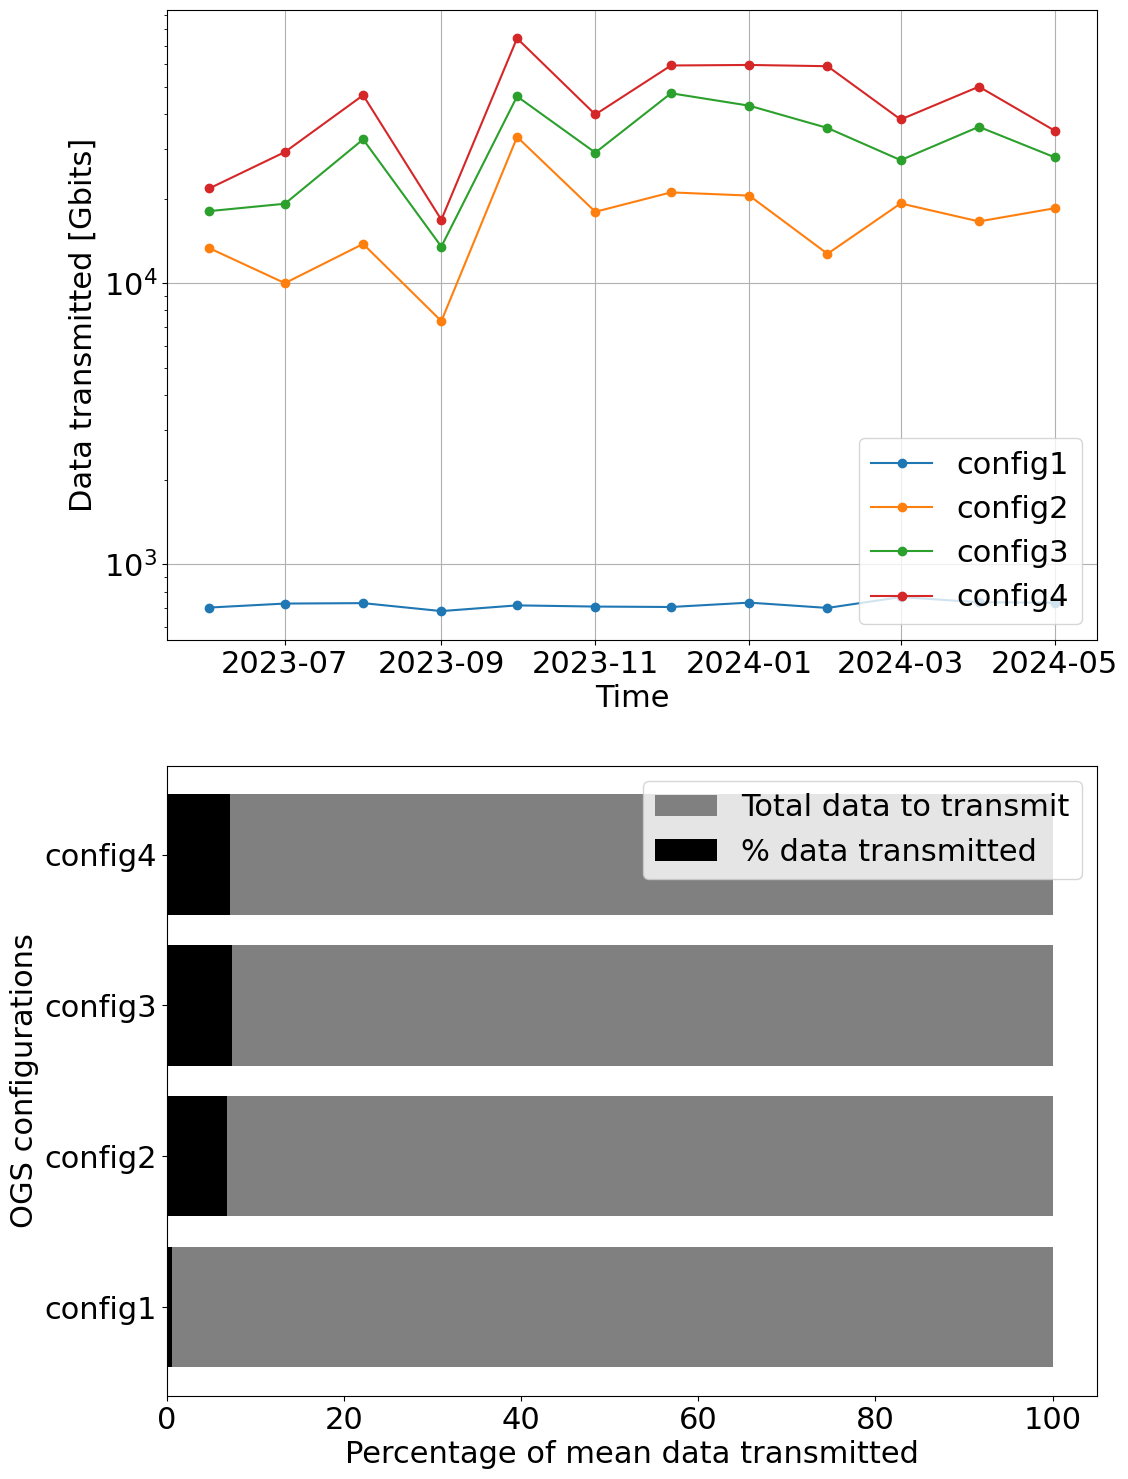

In [135]:
f, (ax1, ax3) = plt.subplots(2, 1, figsize=(12,18))

ax1.plot(pd.to_datetime(config1_dyn_data['Month']), config1_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float), label=f"config1", marker="o")
ax1.plot(pd.to_datetime(config2_dyn_data['Month']), config2_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float), label=f"config2", marker="o")
ax1.plot(pd.to_datetime(config3_dyn_data['Month']), config3_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float), label=f"config3", marker="o")
ax1.plot(pd.to_datetime(config4_dyn_data['Month']), config4_dyn_data['Total_Data_Transmitted_(Gbits)'].astype(float), label=f"config4", marker="o")
ax1.grid()
ax1.legend(loc="lower right")
ax1.set_xlabel('Time')
ax1.set_yscale("log")
ax1.set_ylabel('Data transmitted [Gbits]')

#ax2.plot(nb_OGS, config_dyn_data,  marker='o')
#ax3 = ax2.twinx()
#ax2.plot(nb_OGS, config_perc_avai, "g")
#ax2.grid()
#ax2.set_xlabel('Number of OGS')
#ax2.set_ylabel('Mean data transmitted [Gbits]')

configurations = ["config1", "config2", "config3", "config4"]

#configurations = ["config1", "config2", "config3", "config4"]
#sta_avai = [config1_sta_avai['Network Availability (%)'].astype(float).sum()/(12*100), config2_sta_avai['Network Availability (%)'].astype(float).sum()/(12*100), config3_sta_avai['Network Availability (%)'].astype(float).sum()/(12*100), config4_sta_avai['Network Availability (%)'].astype(float).sum()/(12*100)]
#sta_out = 100* np.array([1-config1_sta_avai['Network Availability (%)'].astype(float).sum()/(12*100), 1-config2_sta_avai['Network Availability (%)'].astype(float).sum()/(12*100), 1-config3_sta_avai['Network Availability (%)'].astype(float).sum()/(12*100), 1-config4_sta_avai['Network Availability (%)'].astype(float).sum()/(12*100)])

b1 = ax3.barh(configurations, np.array([100,100,100,100]), color="grey")
b2 = ax3.barh(configurations, config_perc_avai, color="black")
ax3.legend([b1, b2], ["Total data to transmit", "% data transmitted"], loc="upper right")
ax3.set_xlabel("Percentage of mean data transmitted")
ax3.set_ylabel("OGS configurations")


plt.savefig('Data_tx_combined.svg')

In [106]:
config4_dyn_data

,Month,Total_Data_Transmitted_(Gbits),Maximum_Possible_Data_(Gbits),Percentage_Data_Throughput_(%)
0,2023-06,21715.42654109978,612895.0,3.54309082976689
1,2023-07,29264.031350974004,634055.0,4.6153774279792765
2,2023-08,46607.40078149116,635340.0,7.335820313767615
3,2023-09,16806.62904711293,608535.0,2.7618179804140977
4,2023-10,74249.54005397586,630795.0,11.770787665402525
5,2023-11,39802.92787802908,609250.0,6.533102647193939
6,2023-12,59457.94049905475,627515.0,9.475142506402994
7,2024-01,59715.96864840199,625200.0,9.551498504222968
8,2024-02,59109.308858325305,578330.0,10.220688682642317
9,2024-03,38205.329334893664,621795.0,6.144360976671357


In [ ]:
plt.figure(figsize=(14,8))
plt.plot(pd.to_datetime(config1_sta_data['Month']), config1_sta_data['Total Data Transmitted (Gbits)'].astype(float), label=f"nb of OGS = {config1_nb}")
plt.plot(pd.to_datetime(config2_sta_data['Month']), config2_sta_data['Total Data Transmitted (Gbits)'].astype(float), label=f"nb of OGS = {config2_nb}")
plt.plot(pd.to_datetime(config3_sta_data['Month']), config3_sta_data['Total Data Transmitted (Gbits)'].astype(float), label=f"nb of OGS = {config3_nb}")
plt.plot(pd.to_datetime(config4_sta_data['Month']), config4_sta_data['Total Data Transmitted (Gbits)'].astype(float), label=f"nb of OGS = {config4_nb}")
plt.grid()
plt.xlabel('Time')
plt.yscale("log")
plt.ylabel('Total data transmitted [Gbits]')

plt.title('Data transmitted in static scenarios')
plt.legend()
plt.savefig('Data_static.svg')

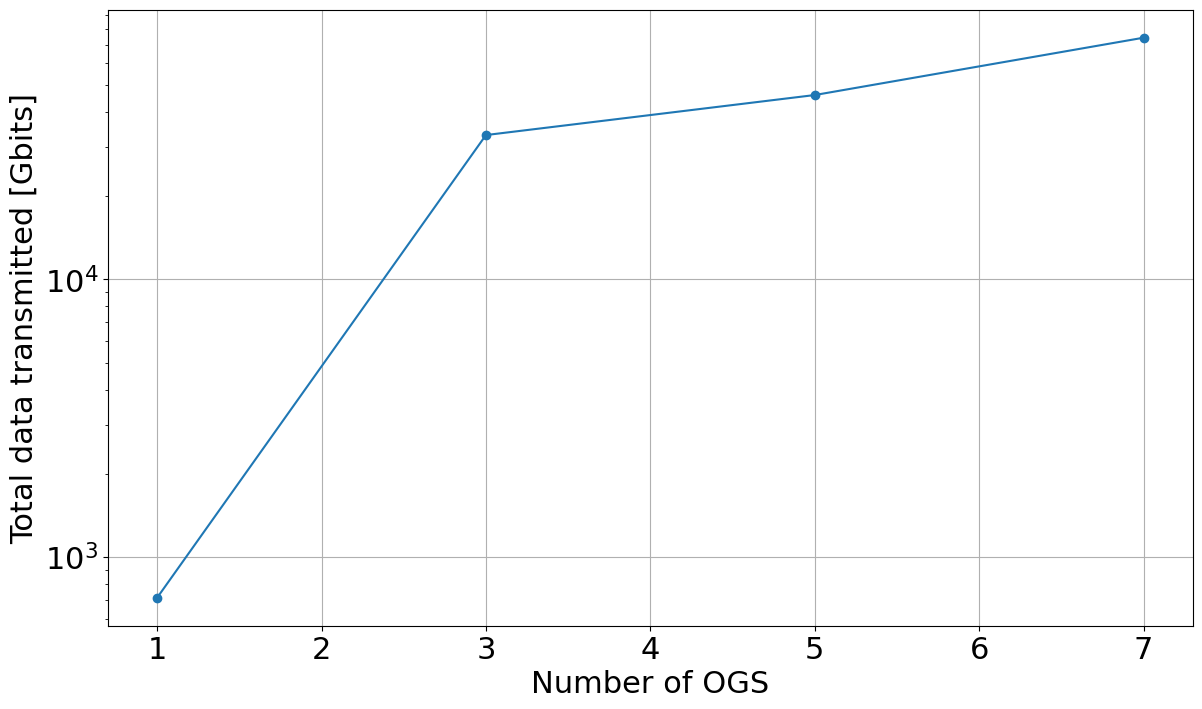

In [30]:
plt.figure(figsize=(14,8))
plt.plot(nb_OGS, config_dyn_data,  marker='o')
#plt.plot(nb_OGS, config_sta_data, label=f"Static data",  marker='o')
plt.grid()
plt.xlabel('Number of OGS')
plt.yscale("log")
plt.ylabel('Total data transmitted [Gbits]')


#plt.title('Data transmitted in terms of nb of OGS')
plt.savefig('Data_nbOGS.svg')

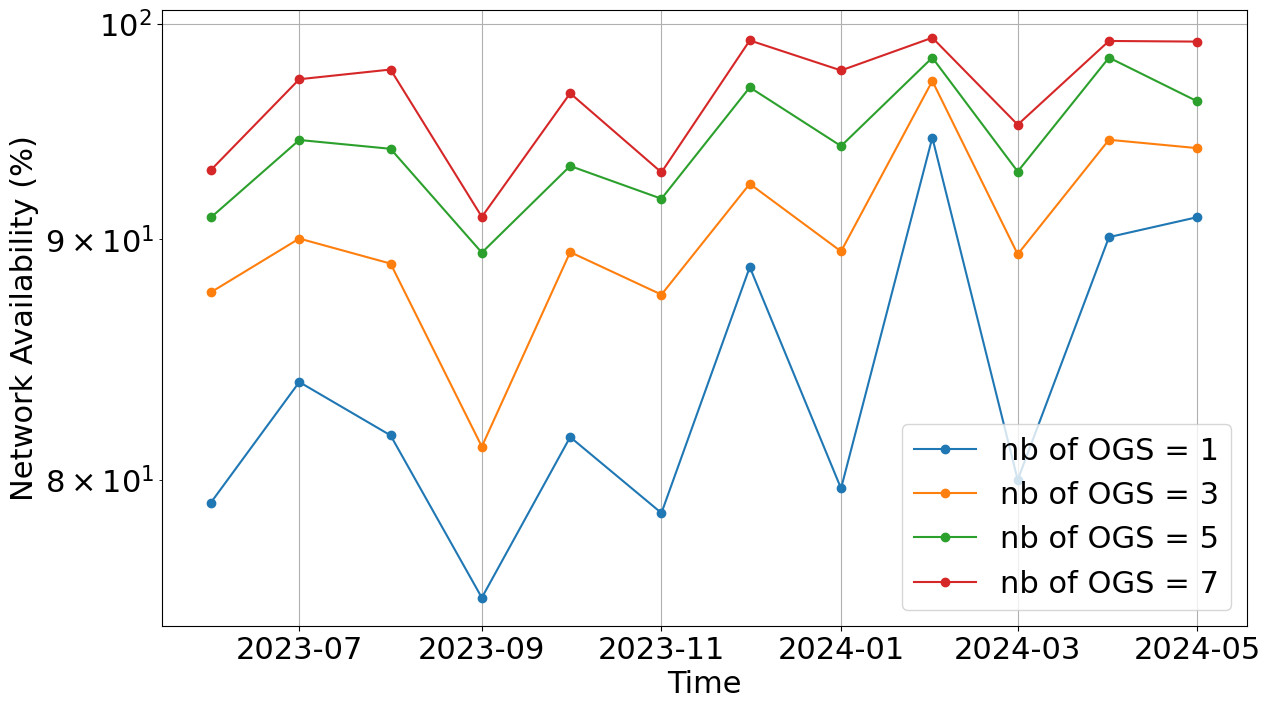

In [31]:
plt.figure(figsize=(14,8))
plt.plot(pd.to_datetime(config1_dyn_avai['Month']), config1_dyn_avai['Network Availability (%)'].astype(float), label=f"nb of OGS = {config1_nb}", marker="o")
plt.plot(pd.to_datetime(config2_dyn_avai['Month']), config2_dyn_avai['Network Availability (%)'].astype(float), label=f"nb of OGS = {config2_nb}", marker="o")
plt.plot(pd.to_datetime(config3_dyn_avai['Month']), config3_dyn_avai['Network Availability (%)'].astype(float), label=f"nb of OGS = {config3_nb}", marker="o")
plt.plot(pd.to_datetime(config4_dyn_avai['Month']), config4_dyn_avai['Network Availability (%)'].astype(float), label=f"nb of OGS = {config4_nb}", marker="o")
plt.grid()
plt.xlabel('Time')
plt.yscale("log")
plt.ylabel('Network Availability (%)')

#plt.title('Network Availability (%) in dynamic scenarios')
plt.legend()
plt.savefig('avai_dynamic.svg')

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(pd.to_datetime(config1_sta_avai['Month']), config1_sta_avai['Network Availability (%)'].astype(float), label=f"nb of OGS = {config1_nb}")
plt.plot(pd.to_datetime(config2_sta_avai['Month']), config2_sta_avai['Network Availability (%)'].astype(float), label=f"nb of OGS = {config2_nb}")
plt.plot(pd.to_datetime(config3_sta_avai['Month']), config3_sta_avai['Network Availability (%)'].astype(float), label=f"nb of OGS = {config3_nb}")
plt.plot(pd.to_datetime(config4_sta_avai['Month']), config4_sta_avai['Network Availability (%)'].astype(float), label=f"nb of OGS = {config4_nb}")
plt.grid()
plt.xlabel('Time')
plt.yscale("log")
plt.ylabel('Network Availability (%)')
plt.title('Network Availability (%) in static scenarios')
plt.legend()
plt.savefig('avai_static.svg')

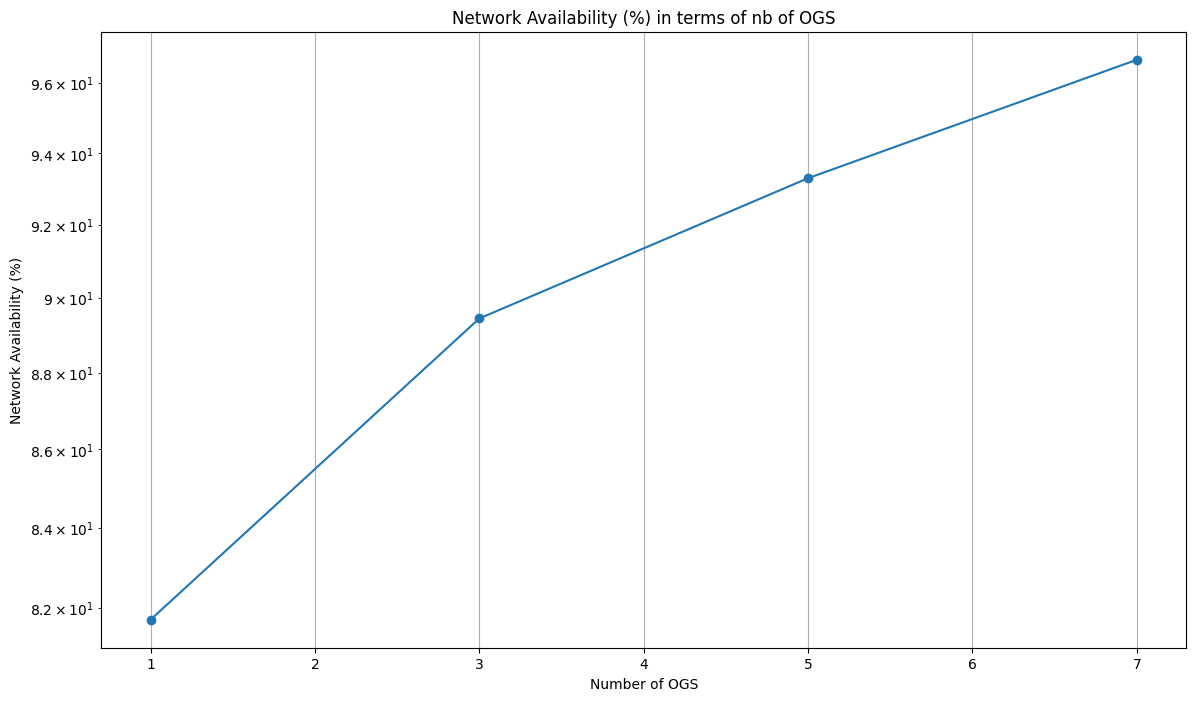

In [18]:
plt.figure(figsize=(14,8))
plt.plot(nb_OGS, config_dyn_avai,  marker='o')
#plt.plot(nb_OGS, config_sta_avai, label=f"Static data",  marker='o')
plt.grid()
plt.xlabel('Number of OGS')
plt.yscale("log")
plt.ylabel('Network Availability (%)')

plt.title('Network Availability (%) in terms of nb of OGS')
#plt.legend()
plt.savefig('avai_nbOGS.svg')

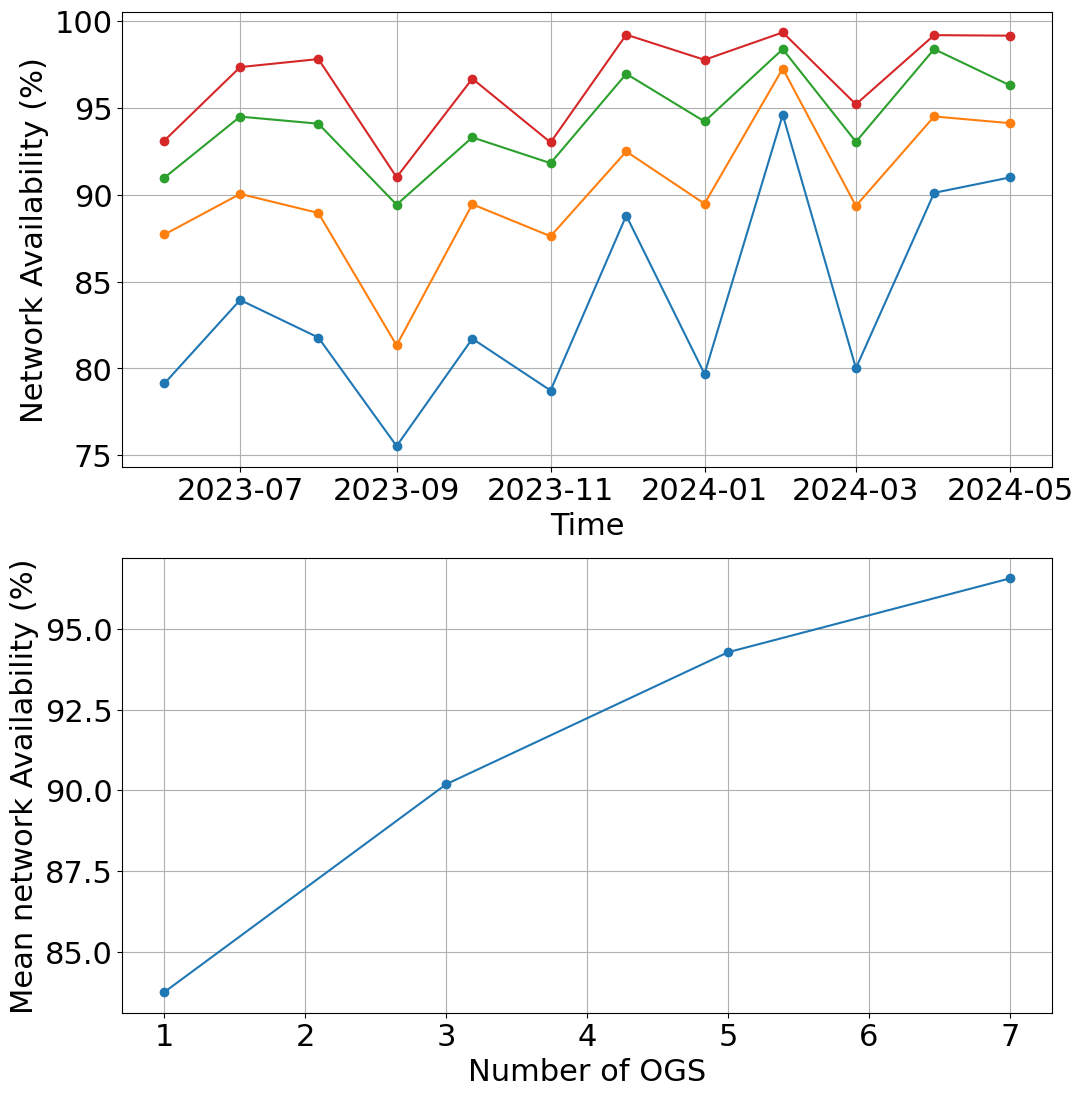

In [109]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,13))
#plt.figure(figsize=(12,13))
#plt.subplot(2, 1, 1)
ax1.plot(pd.to_datetime(config1_dyn_avai['Month']), config1_dyn_avai['Network Availability (%)'].astype(float), label=f"nb of OGS = {config1_nb}", marker="o")
ax1.plot(pd.to_datetime(config2_dyn_avai['Month']), config2_dyn_avai['Network Availability (%)'].astype(float), label=f"nb of OGS = {config2_nb}", marker="o")
ax1.plot(pd.to_datetime(config3_dyn_avai['Month']), config3_dyn_avai['Network Availability (%)'].astype(float), label=f"nb of OGS = {config3_nb}", marker="o")
ax1.plot(pd.to_datetime(config4_dyn_avai['Month']), config4_dyn_avai['Network Availability (%)'].astype(float), label=f"nb of OGS = {config4_nb}", marker="o")
ax1.grid()  
ax1.set_xlabel('Time')
ax1.set_ylabel('Network Availability (%)')


#ax2.figure(figsize=(12,13))
#plt.subplot(2, 1, 2)
ax2.plot(nb_OGS, config_dyn_avai,  marker='o')
ax2.grid()
ax2.set_xlabel('Number of OGS')
ax2.set_ylabel('Mean network Availability (%)')


plt.savefig('Network_availability_combined.svg')

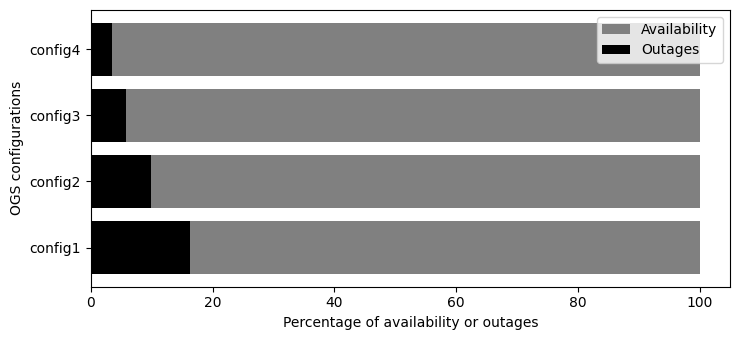

In [43]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

configurations = ["config1", "config2", "config3", "config4"]
dyn_avai = [config1_dyn_avai['Network Availability (%)'].astype(float).sum()/(12*100), config2_dyn_avai['Network Availability (%)'].astype(float).sum()/(12*100), config3_dyn_avai['Network Availability (%)'].astype(float).sum()/(12*100), config4_dyn_avai['Network Availability (%)'].astype(float).sum()/(12*100)]
dyn_out = 100* np.array([1-config1_dyn_avai['Network Availability (%)'].astype(float).sum()/(12*100), 1-config2_dyn_avai['Network Availability (%)'].astype(float).sum()/(12*100), 1-config3_dyn_avai['Network Availability (%)'].astype(float).sum()/(12*100), 1-config4_dyn_avai['Network Availability (%)'].astype(float).sum()/(12*100)])

#configurations = ["config1", "config2", "config3", "config4"]
#sta_avai = [config1_sta_avai['Network Availability (%)'].astype(float).sum()/(12*100), config2_sta_avai['Network Availability (%)'].astype(float).sum()/(12*100), config3_sta_avai['Network Availability (%)'].astype(float).sum()/(12*100), config4_sta_avai['Network Availability (%)'].astype(float).sum()/(12*100)]
#sta_out = 100* np.array([1-config1_sta_avai['Network Availability (%)'].astype(float).sum()/(12*100), 1-config2_sta_avai['Network Availability (%)'].astype(float).sum()/(12*100), 1-config3_sta_avai['Network Availability (%)'].astype(float).sum()/(12*100), 1-config4_sta_avai['Network Availability (%)'].astype(float).sum()/(12*100)])

b1 = plt.barh(configurations, np.array([100,100,100,100]), color="grey")
b2 = plt.barh(configurations, dyn_out, color="black")
plt.legend([b1, b2], ["Availability", "Outages"], loc="upper right")
plt.xlabel("Percentage of availability or outages")
plt.ylabel("OGS configurations")
#plt.title("Availability vs Outages % for dynamic scenarios")

plt.savefig('outages_avai.svg')
plt.show()



In [ ]:
plt.figure()
b1 = plt.barh(configurations, np.array([100,100,100,100]), color="blue")
b2 = plt.barh(configurations, sta_out, color="green")
plt.legend([b1, b2], ["Availability", "Outages"], loc="upper right")
plt.xlabel("Percentage of availability or outages")
plt.ylabel("OGS configurations")
plt.title("Availability vs Outages % for static scenarios")
plt.show()

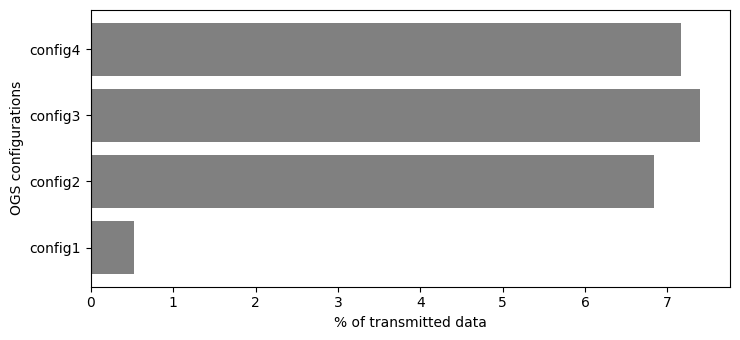

In [45]:
#config1_sta_data['Percentage Data Throughput (%)']

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

configurations = ["config1", "config2", "config3", "config4"]
dyn_out = np.array([config1_dyn_data['Percentage_Data_Throughput_(%)'].astype(float).mean(), config2_dyn_data['Percentage_Data_Throughput_(%)'].astype(float).mean(), config3_dyn_data['Percentage_Data_Throughput_(%)'].astype(float).mean(), config4_dyn_data['Percentage_Data_Throughput_(%)'].astype(float).mean()])

#configurations = ["config1", "config2", "config3", "config4"]
#sta_out = 100* np.array([config1_sta_data['Percentage Data Throughput (%)'].astype(float).sum()/(config1_sta_data['Maximum Possible Data (Gbits)'].astype(float).sum()), config2_sta_data['Percentage Data Throughput (%)'].astype(float).sum()/(config2_sta_data['Maximum Possible Data (Gbits)'].astype(float).sum()), config3_sta_data['Percentage Data Throughput (%)'].astype(float).sum()/(config3_sta_data['Maximum Possible Data (Gbits)'].astype(float).sum()), config4_sta_data['Percentage Data Throughput (%)'].astype(float).sum()/(config4_sta_data['Maximum Possible Data (Gbits)'].astype(float).sum())])

#b1 = plt.barh(configurations, np.array([100,100,100,100]), color="blue")
b2 = plt.barh(configurations, dyn_out, color="grey")
#plt.legend([b2], ["Availability", "Outages"], loc="upper right")
plt.xlabel("% of transmitted data")
plt.ylabel("OGS configurations")
#plt.title("% of data transmitted")

plt.savefig('percent_data_transmitted.svg')
plt.show()


In [35]:
dyn_out

array([0.52996018, 6.83879147, 7.39072359, 7.1621934 ])

In [38]:
config3_dyn_data

,Month,Total_Data_Transmitted_(Gbits),Maximum_Possible_Data_(Gbits),Percentage_Data_Throughput_(%)
0,2023-06,18037.975556859976,418740.0,4.307679122333662
1,2023-07,19162.739576202403,436660.0,4.388480643109605
2,2023-08,32468.007675892226,436205.0,7.443291038821707
3,2023-09,13484.789011397668,418175.0,3.224676035486977
4,2023-10,46159.55097005475,433320.0,10.652531840223102
5,2023-11,29121.483673452287,418685.0,6.9554638149091295
6,2023-12,47362.52185745105,431320.0,10.980831368230328
7,2024-01,42773.904079478845,429335.0,9.962827181450114
8,2024-02,35638.67859688508,396090.0,8.997621398390537
9,2024-03,27384.02151668332,426205.0,6.425082182678128
